In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon
import seaborn as sns

In [2]:
DF= pd.read_csv("/Users/rire948/Desktop/141 c final/141c/train.csv")
DF.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#descriptive statistics summary
DF['SalePrice'].describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

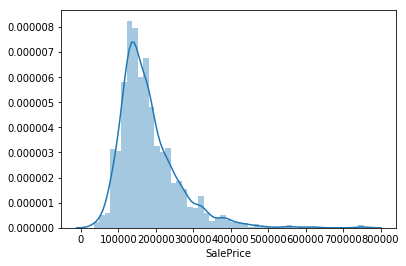

In [4]:
sns.distplot(DF['SalePrice'])
plt.show()

#### Correlation matrix (heatmap style)

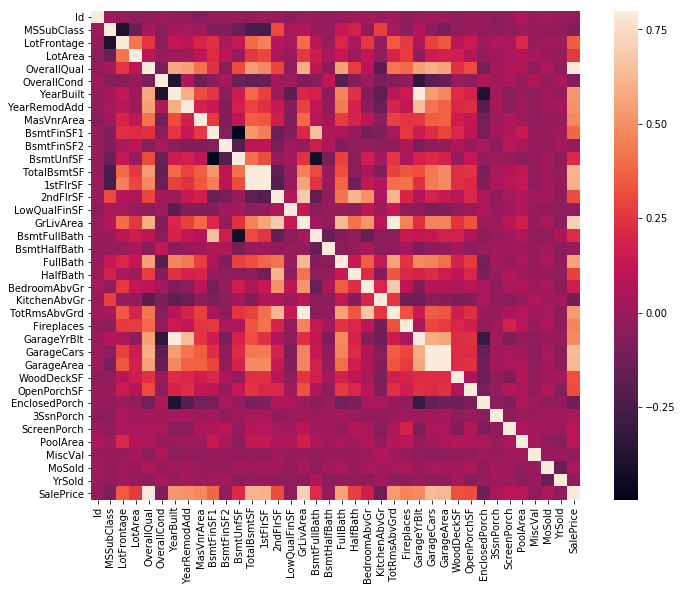

In [5]:
corrmat = DF.corr()
f, ax = plt.subplots(figsize=(12 , 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

/Users/rire948/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


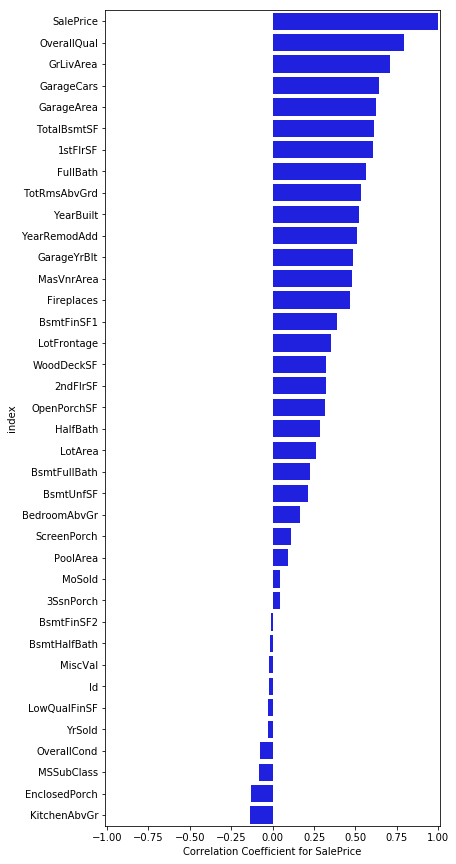

In [6]:
# Correlation between SalePrice and other variables
PriceCorr = pd.DataFrame( corrmat['SalePrice'] )
PriceCorr = PriceCorr.sort_values(by= ["SalePrice"], ascending=False)
PriceCorr = PriceCorr.reset_index()


# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))
#sns.set_color_codes("pastel")
sns.barplot(y = "index", x="SalePrice", data=PriceCorr, color="b")

ax.set(xlim=(-1.01, 1.01), ylabel="index", xlabel="Correlation Coefficient for SalePrice")
plt.show()

## Using Julia's code to do data conversion

In [5]:
DF= pd.read_csv("/Users/rire948/Desktop/141 c final/141c/Data_v2_OrdLevels.csv")



In [6]:
DF.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,2,0,4,Lvl,4,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,2,0,4,Lvl,4,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,2,0,3,Lvl,4,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,2,0,3,Lvl,4,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,2,0,3,Lvl,4,...,0,0,0,NaN,0,12,2008,WD,Normal,250000


## Missing Value Percentage

This indicates that "FirePlaceQu" and "MiscFeature" have more than 50% missing data point.

I would recommend to exclude these variable for analysis

In [168]:
L = []
for c in range(DF.shape[1]):
    MP = np.average(pd.isnull(DF.iloc[:,c]))
    ColName = DF.columns[c]
    pair = ( ColName,  MP )
    L = L + [pair]

/Users/rire948/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


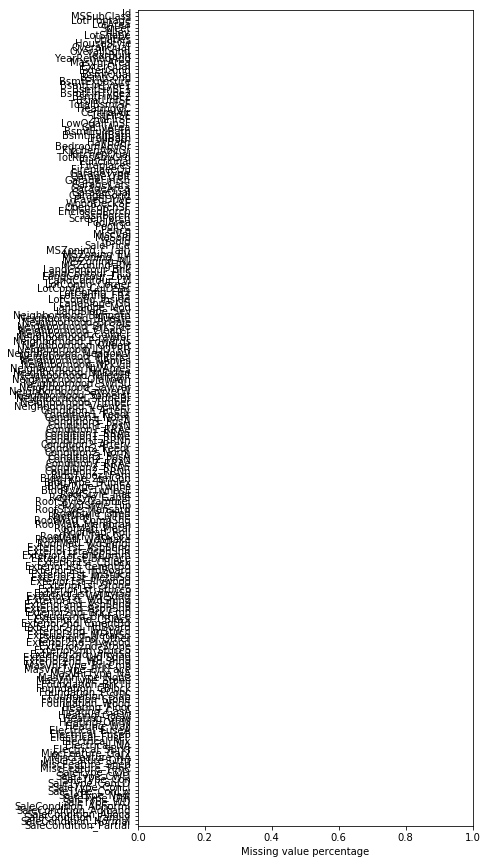

In [169]:
MissingPercentage= pd.DataFrame(L)
f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(MissingPercentage.iloc[:,1],MissingPercentage.iloc[:,0] )
ax.set(xlim=(0, 1), ylabel="", xlabel="Missing value percentage")


plt.show()

##  Correlation

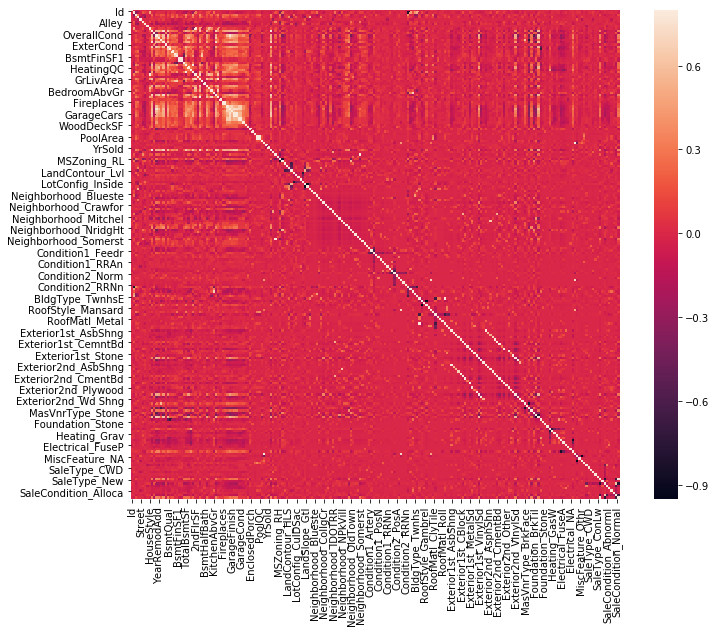

In [170]:
corrmat = DF.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

/Users/rire948/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


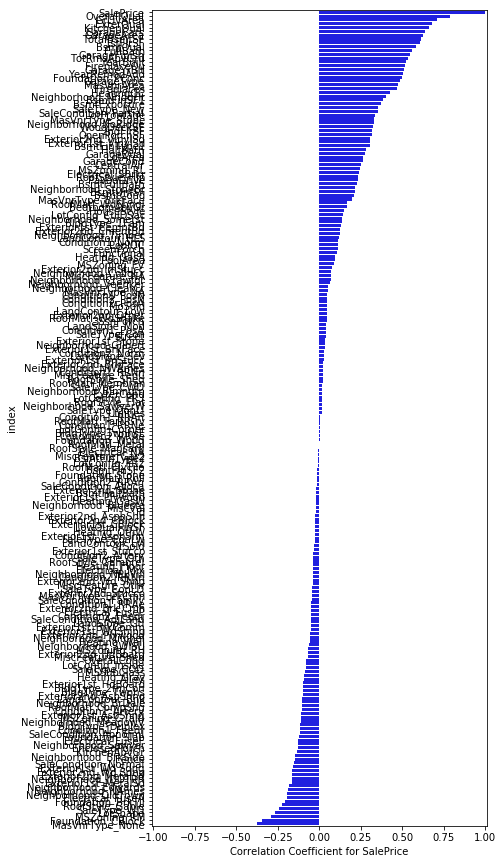

In [171]:
# Correlation between SalePrice and other variables
PriceCorr = pd.DataFrame( corrmat['SalePrice'] )
PriceCorr = PriceCorr.sort_values(by= ["SalePrice"], ascending=False)
PriceCorr = PriceCorr.reset_index()


# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))
#sns.set_color_codes("pastel")
sns.barplot(y = "index", x="SalePrice", data=PriceCorr, color="b")

ax.set(xlim=(-1.01, 1.01), ylabel="index", xlabel="Correlation Coefficient for SalePrice")
plt.show()

In [172]:
PriceCorr[abs(PriceCorr.SalePrice) > 0.5]

,index,SalePrice
0,SalePrice,1.000000
1,OverallQual,0.790982
2,GrLivArea,0.708624
3,ExterQual,0.682639
4,KitchenQual,0.659600
5,GarageCars,0.640409
6,GarageArea,0.623431
7,TotalBsmtSF,0.613581
8,1stFlrSF,0.605852
9,BsmtQual,0.585207


In [173]:
PriceCorr

,index,SalePrice
0,SalePrice,1.000000
1,OverallQual,0.790982
2,GrLivArea,0.708624
3,ExterQual,0.682639
4,KitchenQual,0.659600
5,GarageCars,0.640409
6,GarageArea,0.623431
7,TotalBsmtSF,0.613581
8,1stFlrSF,0.605852
9,BsmtQual,0.585207


In [174]:
DF.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,Utilities,HouseStyle,OverallQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,2,0,4,4,2.0,7,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,2,0,4,4,1.0,6,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,2,0,3,4,2.0,7,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,2,0,3,4,2.0,7,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,2,0,3,4,2.0,8,...,0,0,0,1,0,0,0,0,1,0


In [175]:
DF.iloc[0:3,0:10]

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,Utilities,HouseStyle,OverallQual
0,1,60,65.0,8450,2,0,4,4,2.0,7
1,2,20,80.0,9600,2,0,4,4,1.0,6
2,3,60,68.0,11250,2,0,3,4,2.0,7


In [176]:
DF.iloc[0:3,11:20]

,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1
0,2003,2003,196.0,4,3,4,3,1,6
1,1976,1976,0.0,3,3,4,3,4,5
2,2001,2002,162.0,4,3,4,3,2,6


In [177]:
DF.iloc[0:3,21:30]

,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF
0,1,0,150,856,5,1,856,854,0
1,1,0,284,1262,5,1,1262,0,0
2,1,0,434,920,5,1,920,866,0


In [178]:
DF.iloc[0:3,31:40]

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional
0,1,0,2,1,3,1,4,8,7
1,0,1,2,0,3,1,3,6,7
2,1,0,2,1,3,1,4,6,7


In [179]:
DF.iloc[0:3,41:50]

,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive
0,0,4,2003.0,2,2,548,3,3,2
1,3,4,1976.0,2,2,460,3,3,2
2,3,4,2001.0,2,2,608,3,3,2


In [180]:
DF.iloc[0:3,51:60]

,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold
0,61,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,5
2,42,0,0,0,0,0,0,0,9


In [181]:
DF.iloc[0:3,61:70]

,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low
0,208500,0,0,0,1,0,0,0,0
1,181500,0,0,0,1,0,0,0,0
2,223500,0,0,0,1,0,0,0,0


In [182]:
DF.iloc[0:3,71:80]

,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn
0,0,0,0,0,1,1,0,0,0
1,0,0,1,0,0,1,0,0,0
2,0,0,0,0,1,1,0,0,0


In [183]:
DF.iloc[0:3,71:81]

,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste
0,0,0,0,0,1,1,0,0,0,0
1,0,0,1,0,0,1,0,0,0,0
2,0,0,0,0,1,1,0,0,0,0


Categorical data list:
MSZoning
Street
Alley

### RICARDO

In [114]:
DF= pd.read_csv("/Users/rire948/Desktop/141 c final/141c/Data_v4_AllNaNsReplaced_dummies.csv")

In [115]:
DF.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,Utilities,HouseStyle,OverallQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,2,0,4,4,2.0,7,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,2,0,4,4,1.0,6,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,2,0,3,4,2.0,7,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,2,0,3,4,2.0,7,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,2,0,3,4,2.0,8,...,0,0,0,1,0,0,0,0,1,0


In [116]:
"""continouse data"""
Cont_Var_idx1 = DF.columns[ DF.dtypes == np.int64  ]
Cont_Var_idx1
Cont_Var_idx2 = DF.columns[ DF.dtypes == np.float64  ]
Cont_Var_idx2 = list (Cont_Var_idx2)
Continus_data=[]
Continus_data.extend(Cont_Var_idx1)
Continus_data.extend(Cont_Var_idx2)


In [117]:
"""categorical"""
Cate_Var_idx = DF.columns[ DF.dtypes == np.object ]
Cate_Var_idx = list (Cate_Var_idx)

Cate_Var_idx2= Cate_Var_idx.copy()


In [118]:
finalallfeatur=[]
finalallfeatur.extend(Continus_data)
finalallfeatur.extend(Cate_Var_idx2)
type(finalallfeatur)

fin=[]
for i in finalallfeatur:
    fin.append(i)
fin

['Id',
 'MSSubClass',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'Utilities',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl'

In [119]:
"based on previus analysis we found out that Utilities LandSlope Condition2"
fin.remove("Utilities")

fin.remove("LandSlope_Sev")
fin.remove("LandSlope_Mod")
fin.remove("LandSlope_Gtl")

fin.remove("Condition2_Artery")
fin.remove("Condition2_Feedr")
fin.remove("Condition2_Norm")
fin.remove("Condition2_PosA")
fin.remove("Condition2_PosN")
fin.remove("Condition2_RRAe")
fin.remove("Condition2_RRAn")
fin.remove("Condition2_RRNn")

"""remove what we are trying to estimate"""
fin.remove("SalePrice")

print(len(fin))

Features_used=fin[0:201]
Features_used

201


['Id',
 'MSSubClass',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscVal',
 'MoSold',
 'YrSold',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'LotConfig_Corner',
 'Lot

In [120]:
### LASSO

In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import train_test_split 
from sklearn.linear_model import Lasso

"""root-mean-square deviation arguments are the features u want to use to estimate coeficientes
this functionr returns the coeficients and the rmse after geting the rmse after dividint the test into test and trainig"""

def RMSE(DF,features):#root-mean-square deviation
  
    X = DF[features]
    y = DF['SalePrice']
    
    #separating into train and test
    X_train , X_test, y_train, y_test = train_test_split(X,y, random_state = 1, train_size = 0.8) 
    linreg = Lasso(alpha = 2, max_iter = 1000, tol = 1e-20)
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),list(zip(features, linreg.coef_)))

In [139]:
u,y=RMSE(DF,Features_used)##using all 213 features we get a mean square error of 30832.55 dollars
print(u,len(y))

30864.966840556746 201


/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [127]:
"""Using cross validation we get a rmse using all features of 31258.78586732201""" 

from sklearn.cross_validation import cross_val_score

def cvv(DF,a):
    X = DF[a]
    y = DF.SalePrice
    
    return np.sqrt(-cross_val_score(Lasso(alpha = 2, max_iter = 1000, tol = 1e-20), X, y, cv = 10, scoring = 'neg_mean_squared_error')).mean() # Avg RMSE for Cross Validation

#['size(ft2)','location','Bedroom','Bathroom']
print(cvv(DF,Features_used[0:100]))

/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

31258.78586732201


/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [32]:
"""The Recursive Feature Elimination (or RFECV) works by recursively removing attributes and building a model on those attributes that remain.
It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute."""
"""it is using crosss validation(scoring = 'neg_mean_squared_error') to get the scoring and chosing if the variable should be added to the model"""
"""https://machinelearningmastery.com/feature-selection-machine-learning-python/"""

'https://machinelearningmastery.com/feature-selection-machine-learning-python/'

In [143]:
from sklearn.feature_selection import RFECV

def RFECVCVVVVVVV(DF,Features_used):
    X = DF[Features_used]
    y = DF.SalePrice

    rfecv = RFECV(estimator = Lasso(alpha = 2, max_iter = 5000, tol = 1e-20), step = 1, cv = 3, scoring = 'neg_mean_squared_error')
    rfecv.fit(X,y)
    ##print("Optimal number of features: %d" % rfecv.n_features_)
    ##print('Selected features: %s' % list(X.columns[rfecv.support_]))
    return ("Optimal number of features: %d" % rfecv.n_features_),list(X.columns[rfecv.support_])

In [144]:
numberfeatures,namesfeatrues=RFECVCVVVVVVV(DF,Features_used)


/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective di

In [145]:
print(numberfeatures,namesfeatrues)

Optimal number of features: 146 ['MSSubClass', 'Street', 'Alley', 'LotShape', 'OverallQual', 'OverallCond', 'YearBuilt', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', '1stFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolArea', 'PoolQC', 'Fence', 'MoSold', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RM', 'LandContour_Bnk', 'LandContour_HLS', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neig

In [146]:
RMSE(DF,namesfeatrues)[0] ##using only the features recursive feature elimination we get a RMSE of:


/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


31743.654209504733

In [153]:
def RFECVCVVVVVVVlinearreg(DF,Features_used):
    X = DF[Features_used]
    y = DF.SalePrice

    rfecv = RFECV(estimator = LinearRegression(), step = 1, cv = 10, scoring = 'neg_mean_squared_error')
    rfecv.fit(X,y)
    ##print("Optimal number of features: %d" % rfecv.n_features_)
    ##print('Selected features: %s' % list(X.columns[rfecv.support_]))
    return ("Optimal number of features: %d" % rfecv.n_features_),list(X.columns[rfecv.support_])

In [154]:
RMSE(DF,RFECVCVVVVVVVlinearreg(DF,Features_used)[1])

/Users/rire948/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


(29824.84287541662,
 [('MSSubClass', -65.29968182613256),
  ('Street', -4605.489028342416),
  ('Alley', 2761.8849464687078),
  ('LotShape', -1820.2187274634855),
  ('OverallQual', 7031.353511817074),
  ('OverallCond', 5505.924252280413),
  ('YearBuilt', 257.04591114119586),
  ('YearRemodAdd', 18.873429291080992),
  ('ExterQual', 7817.884584430378),
  ('ExterCond', -3245.4619354536762),
  ('BsmtQual', 3768.861774534287),
  ('BsmtCond', -3509.45348271417),
  ('BsmtExposure', 5401.032421595397),
  ('BsmtFinType1', -252.1685066229518),
  ('BsmtFinSF1', 24.05756873979269),
  ('BsmtFinType2', 928.134347351592),
  ('BsmtFinSF2', 9.773297984805545),
  ('BsmtUnfSF', 6.927582396189462),
  ('TotalBsmtSF', 4.238175544059209),
  ('HeatingQC', 1505.899358011342),
  ('CentralAir', 260.6594265822962),
  ('1stFlrSF', 40.09622646134646),
  ('2ndFlrSF', 43.45816055873125),
  ('LowQualFinSF', 14.276646229043552),
  ('GrLivArea', 5.938156869541341),
  ('BsmtFullBath', 2002.82705701778),
  ('BsmtHalfBath', 

In [ ]:
"""using linear reg instead of loasso gives u a better 
esstimation however since lasso does have a penalty for the biguer and more coefficient you use """
"""so since the difference is not that big(around 2000 rmse) we would use the lasso since thanks to the penalty
it should be making sure the model does not overfit the data"""